In [1]:
import tensorflow as tf

tf.random.set_seed(0)

n_input = 1
n_hidden = 20
n_output = 1

In [2]:
w1 = tf.Variable(tf.random.normal([n_input, n_hidden]))
w2 = tf.Variable(tf.random.normal([n_hidden, n_output]))

b1 = tf.Variable(tf.random.normal([n_hidden]))
b2 = tf.Variable(tf.random.normal([n_output]))

optimizer = tf.optimizers.Adam(learning_rate=0.1)

2022-03-05 05:32:27.694432: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-05 05:32:27.695398: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
def forward(x):
    hidden = x @ w1 + b1
    hidden = tf.nn.tanh(hidden)
    y = hidden @ w2 + b2
    return y


@tf.function
def step(x):
    weights = [w1, b1, w2, b2]
    with tf.GradientTape() as tape:
        y = forward(x)
        dy_dx = tf.gradients(y, x)[0]
        residual = dy_dx - y
        boundary = y[0] - 1
        loss = (residual)**2 + (boundary)**2
        loss = tf.reduce_mean(loss)

    grads = tape.gradient(loss, weights)
    optimizer.apply_gradients(zip(grads, weights))

    return loss

In [4]:
x = tf.linspace(0.0, 1.0, 100)
X = tf.reshape(x, (-1, 1))

losses = []
for i in range(100):
    loss = step(X).numpy()
    losses.append(loss)
    if i % 10 == 0:
        print("{:03d} : {:08.6f}".format(i, sum(losses[-10:]) / 10))

000 : 0.395798
010 : 1.932527
020 : 0.414696
030 : 0.149168
040 : 0.055339
050 : 0.020562
060 : 0.008600
070 : 0.004708
080 : 0.002449
090 : 0.001630


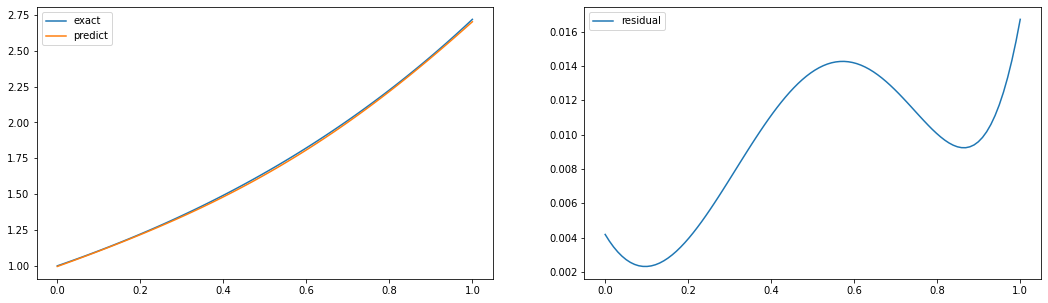

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

domain = x.numpy()
exact = tf.exp(domain).numpy()
predict = forward(X).numpy().flatten()

axs[0].plot(domain, exact, label='exact')
axs[0].plot(domain, predict, label='predict')
axs[0].legend()

axs[1].plot(domain, exact - predict, label='residual')
axs[1].legend()
fig.savefig('residual.jpg', bbox_inches='tight')

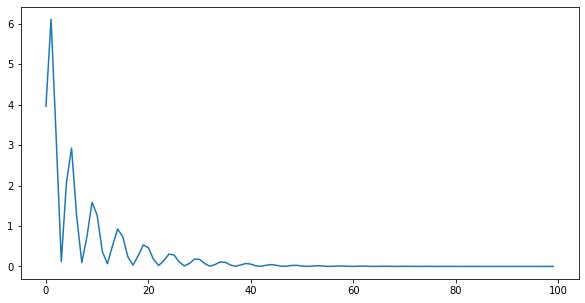

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.savefig('loss.jpg', bbox_inches='tight')